In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Setting some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

#Homework 4

Couple of reference site:
<ul>
<li/>http://matplotlib.org/examples/pylab_examples/
<li/>http://docs.scipy.org/doc/numpy/
</ul>

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



We can follow the following steps to get the required graphs showing sine and tangents of x:

1. Create a numpy array x with values from 0 to 2*pi with 0.001 as step value
2. Set the height and width of the figure
3. Add a subplot to the figure - The 3 digit parameter gives the position of the subplot
4. Set the title and limits on the axes
5. Plot (x, numpy.sin(x)) where numpy.sin(x) gives the sine of x
6. Add another subplot to the figure
7. Set the tilte and limits on the axes
6. Plot (x, numpy.tan(x)) where numpy.tan(x) gives the tangent of x
9. Use tight_layout() to make sure that the subplots fit to the figure area
10. Save the figure to a file

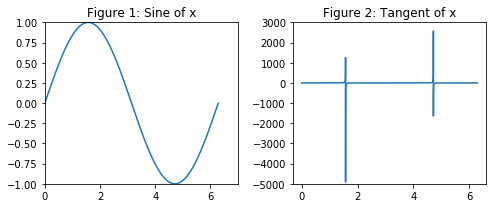

In [14]:
x = np.arange(0, 2*np.pi, 0.001) #Create a numpy array x values starting from 0 to 2*pi, using 0.001 as step value
fig = plt.figure(figsize=(7,3)) #set the height and width of the figure

ax1 = fig.add_subplot(121)
ax1.set_title("Figure 1: Sine of x")
ax1.set_xlim([0,7])
ax1.set_ylim([-1, 1])
plt.plot(x, np.sin(x))

ax2 = fig.add_subplot(122)
ax2.set_title("Figure 2: Tangent of x")
ax2.set_ylim((-5000,3000))
plt.plot(x, np.tan(x))
plt.tight_layout()
plt.savefig("sinevstangent.png", dpi=150)

#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


To obtain the given figure:

1. Set the values of r from 0 to 3 with the required steps (using 0.01 as step gives spiral plot that is not smooth)
2. Add the subplot for the spiral plot using a 'polar' projection
3. Plot the spiral using plot method with theta and r as parameters and color 'r' for red
4. We can set the position and values of the ticks as we want. For the given figure, we need to set the ticks at an angle of 22.5 degrees and also the values that needs to be shown are 0.5,1.0,1.5, 2.0 and 2.5
5. We can also set the grid lines to dotted and also set the title for the plot
6. We need to create new radius values for the scatter plot with an random offset value between -0.5 and 0.5. So we use the random.uniform function. Since there are 3/0.01 =300 values for r, we need to generate 300 random values too.
7. We use the scatter method with the required parameters to plot the scatter plot
8. we can set the radius limit to 2.5 as required.

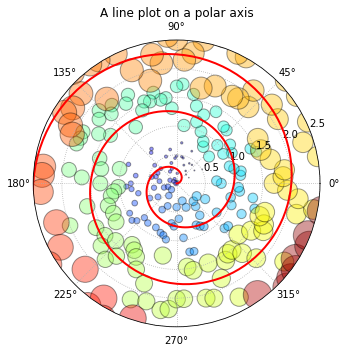

In [24]:
r = np.arange(0, 3, 0.01)
theta = 2*np.pi*r

fig = plt.figure(figsize = (5,5), facecolor = 'white')

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r, color='r', linewidth=2)

ax.set_rticks([0.5,1.0,1.5,2.0,2.5])
ax.grid(ls='dotted') #setting the grid style to dotted lines
ax.set_title("A line plot on a polar axis", va='bottom')


# adding offset using uniform function
r1= r + np.random.uniform(-.5, .5, size=(300,))
area = 100*r**2
colors = theta
ax.scatter(theta, r1, c=colors, s=area, cmap=plt.cm.jet, alpha=0.4, edgecolor ='black')   #The alpha is a paremeter for transparency (0 (transparent) and 1 (opaque)
ax.set_rmax(2.5)

plt.tight_layout()
plt.savefig("linescatter.png", dpi=150)

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


To obtain the graph as shown in the figure:

1. We need to import the LogNorm module from matplotlib.colors
2. Define values of x using a random normal distribution with size 100000
3. Define values of y using a geometric distribution with size 100000 and p as 0.1
4. Plot the histogram for x and y with bin size 40 and norm = LogNorm()
5. We can use the colorbar() method to show the colorbar
6. We can set the title and its properties like font size and font weight.

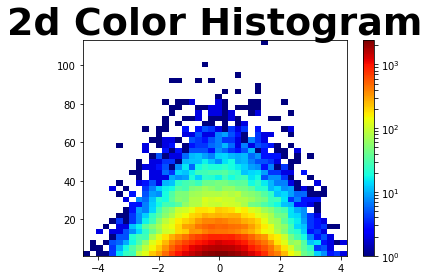

In [18]:
from matplotlib.colors import LogNorm
x = np.random.normal(size=100000)
y = np.random.geometric(p=0.1, size=100000)
fig = plt.figure(facecolor='white')
plt.hist2d(x, y, bins=40, norm=LogNorm(), cmap=plt.cm.jet)
plt.colorbar()
plt.title("2d Color Histogram", fontsize = 38, fontweight= 'bold')
plt.tight_layout()
plt.savefig("2dcolorhistogram.png", dpi=150)

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


To obtain the given plot:

x and y have been define in Homework 4.3
We need to use np.histogram2() in order to get the third dimension.

##### hist, xedges, yedges = np.histogram2d(x, y, bins=40)
This function histograms the values of x and y along two dimensions. xedges, and yedges will get the bin edges along the two dimensions. And hist takes an array containing the x and y coordinates of the points.

After this, we need to use the meshgrid function create coordinate arrays. Since these values have one extra value, we have to remove the last one while creating the coordinate arrays.

Finally, we can use the plot_surface funtion to plot it. 


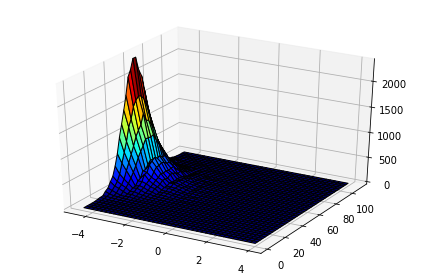

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=40)     

xm, ym = np.meshgrid(xedges[:-1], yedges[:-1]) 

ax.plot_surface(xm, ym, hist, rstride=1, cstride=1, edgecolor='black', cmap=plt.cm.jet)
plt.tight_layout()
plt.savefig("histogramplotin3d.png", dpi=150)


# More Tutorials on Data Presentation in Python

Sources for the following content:
1. https://matplotlib.org/gallery

## Matplotlib.path()

The object underlying all of the matplotlib.patch objects is the Path, which supports the standard set of moveto, lineto, curveto commands to draw simple and compound outlines consisting of line segments and splines. The Path is instantiated with a (N,2) array of (x,y) vertices, and a N-length array of path codes. 

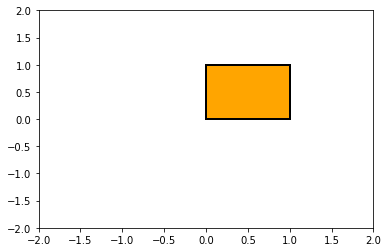

In [20]:
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

## Fill()

We can use fill(x,y) to fill a polygonal area defined by the list of coordinates x and y.

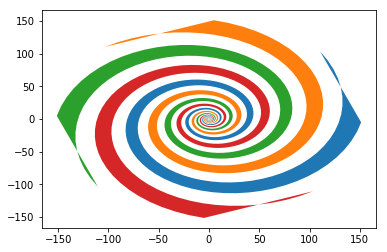

In [21]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()

We can also fill the area between the lines in a graph as follows.

Text(0.5,0,'x')

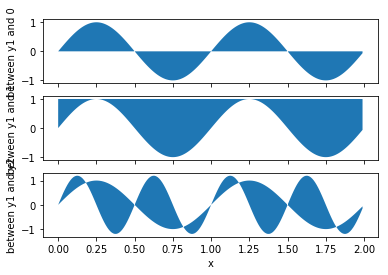

In [26]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')


## Scatter Masked

We can mask some data points and add a line to separate the data points. In the following example, the areas with radius less than r0 are masked from area1 and those greater than r0 are masked from area2. And a boundary line is added to show the separation.

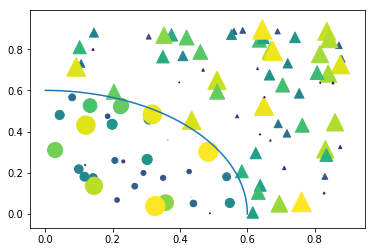

In [28]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x * x + y * y)

area1 = np.ma.masked_where(r < r0, area) #Mask areas from area1 for radius less than r0
area2 = np.ma.masked_where(r >= r0, area) #Mask areas from area2 for radius more than or equal to r0

plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)

# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

## StackPlot

Stackplots are generated by plotting different datasets vertically on top of one another rather than overlapping with one another.

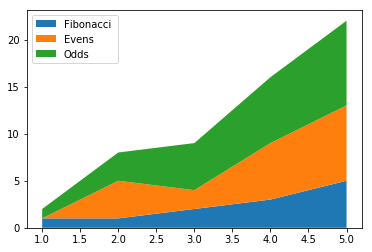

In [36]:
x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

## Violins and BoxPlots

Violin plots add useful information such as the distribution of the sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile range as outliers above or below the whiskers hereas violin plots show the whole range of the data.

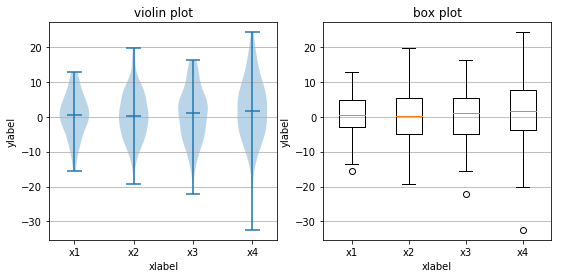

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

## Table Within a Plot

We can use a table within a plot to describe the data even more using the table() function as in the following example.

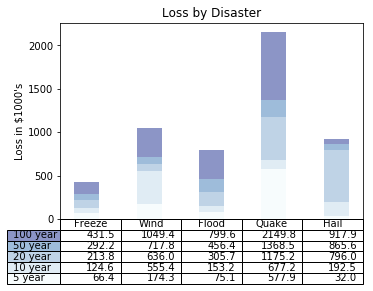

In [38]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

## Annotaed Heatmaps

It is often desirable to show data which depends on two independent variables as a color coded image plot. This is often referred to as a heatmap. If the data is categorical, this would be called a categorical heatmap. Matplotlib's imshow function makes production of such plots particularly easy.

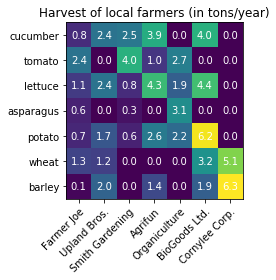

In [40]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Showing all the ticks with labesl of the respective list entries.
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))

ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

## Barcodes

We can also use matplotlib to generate barcodes. The followin example shows how we can generate 1D barcodes.

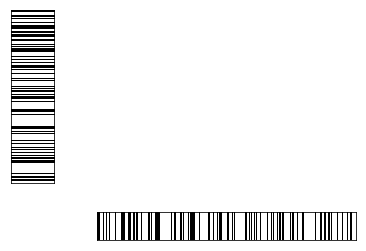

In [44]:
# Fixing random state for reproducibility
np.random.seed(19680801)


# the bar
x = np.where(np.random.rand(500) > 0.7, 1.0, 0.0)

axprops = dict(xticks=[], yticks=[])
barprops = dict(aspect='auto', cmap=plt.cm.binary, interpolation='nearest')

fig = plt.figure()

# a vertical barcode
ax1 = fig.add_axes([0.1, 0.3, 0.1, 0.6], **axprops)
ax1.imshow(x.reshape((-1, 1)), **barprops)

# a horizontal barcode
ax2 = fig.add_axes([0.3, 0.1, 0.6, 0.1], **axprops)
ax2.imshow(x.reshape((1, -1)), **barprops)


plt.show()

## Nested Pie Charts

The most straightforward way to build a pie chart is to use the pie method.

In the following program, pie takes values corresponding to counts in a group. We'll first generate some fake data, corresponding to three groups. In the inner circle, we'll treat each number as belonging to its own group. In the outer circle, we'll plot them as members of their original 3 groups.The effect of the donut shape is achieved by setting a width to the pie's wedges through the wedgeprops argument.

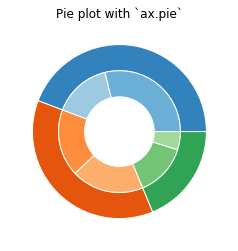

In [45]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

## Contours

This program displays simple contour plotting using default labels. The inline argument to clabel will control whether the labels are draw over the line segments of the contour, removing the lines beneath the label.

Text(0.5,1,'Simplest default with labels')

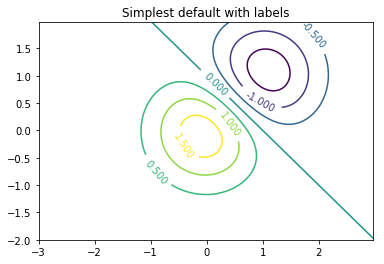

In [46]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')